<a href="https://colab.research.google.com/github/PearlSikka/Battles-in-Time/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Separate out the card images from the train-XXX.jpg groups of images. Other than for
those in train-001.jpg, in your code you will want to associate each card with its ID number
(you'll have to do this manually, but it should not take too long).

CODE HAS BEEN TESTED ON GOOGLE COLAB ON PYTHON VERSION 3.7.12

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Importing necessary libraries**

In [2]:
import matplotlib.pyplot as plt                                                   #for plotting images 
import numpy as np                                                                #library for mathematical operations            
from PIL import Image                                                             
import glob                                                                       #for reading files
import os                                                                         #for performing os operations

import matplotlib.image as mpimg                                                  
import cv2                                                                        #opencv

import random as rng                                                              #to generate random seed
rng.seed(12345)

from google.colab.patches import cv2_imshow

In [3]:
data_dir='drive/My Drive/Image_Analysis/DATA/'                                    #data directory path
results_dir='drive/My Drive/Image_Analysis/RESULTS_3/'                            #results directory path

Before separating out card images for all the training set images, **let's separate cards for 'train-002.jpg' image**. 

**Reading image and converting to grayscale**

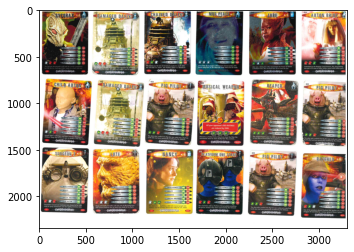

In [4]:
im_gbr= cv2.imread(data_dir+'train-002.jpg')                                          #Reading image
im= cv2.cvtColor(im_gbr,cv2.COLOR_BGR2RGB)                                            #converting to RGB 
plt.imshow(im)

(2338, 3306) uint8


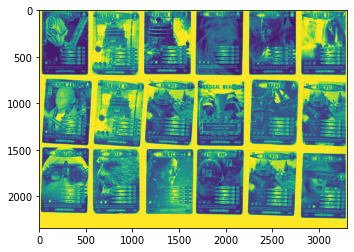

In [5]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)                                          #converting to grayscale 
print(gray.shape, gray.dtype)
plt.imshow(gray)

**Blurring and Thresholding**: After converting image to grayscale, blurring is performed using Gaussian filter of kernel size (5,5). Blurred image is further converted to black and white image using threshold_binary_inv.  

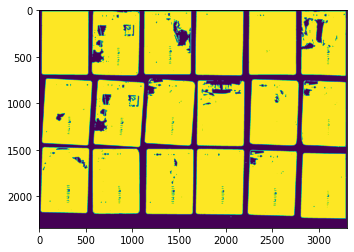

In [6]:
blurred= cv2.GaussianBlur(gray,(5,5),cv2.BORDER_DEFAULT)                            #gaussian blurring 
thresh = 245
fm = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY_INV)[1]                  #binary thresholding
plt.imshow(fm)
fm=cv2.convertScaleAbs(fm)

**Contours and Bounding Rectangle**: After image is threshold to binary values, contours are found. Contours which are above the specific threshold of area are selected and rectangular bounding boxes are created around them.

In [7]:
cnt_mod,_ = cv2.findContours(fm, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)        #find contours with external 
contours=[]

for c in cnt_mod:
 if cv2.contourArea(c)>20000:                                                       #if contour area greater than 20000, then keep
  contours.append(c)

contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)

for i, c in enumerate(contours):                                                    #looping through all contours 
  contours_poly[i] = cv2.approxPolyDP(c, 3, True)   
  boundRect[i] = cv2.boundingRect(contours_poly[i])                                 #creating bounding boxes for each contour


**Slicing the cards**: After finding the bounding boxes for all cards in a training set, the training set is sliced on the coordinates of bounding boxes. This will generate all cards separated from the train set. 

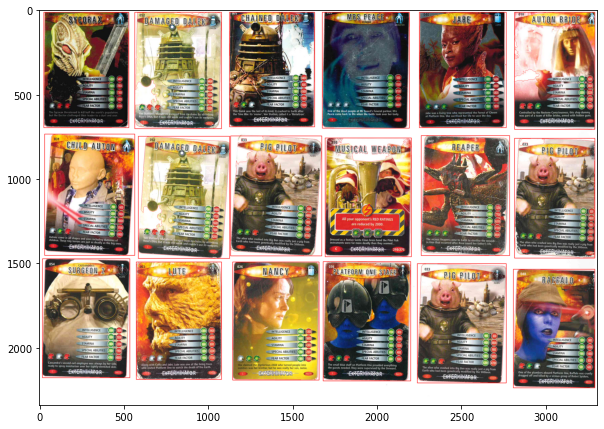

In [8]:
plt.figure(figsize=(10,10))

result= im.copy()
for i in range(len(contours)):                                                      #plotting bounding boxes for cards                            
  
  color = (255,0,0)                                                                 #setting red color for bounding boxes
  cv2.drawContours(result, contours_poly, i, color)                                 #drawing contours           
  cv2.rectangle(result, (int(boundRect[i][0]), int(boundRect[i][1])), \
        (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)   #drawing bounding boxes on original image

plt.imshow(result)


As can be seen above, the red bounding boxes shows the cards. These bounding boxes are sliced based on their corresponding coordinates.

**Implementing for all the train set images** : The above process is implemented for all training set images and cards are separated. The resulting card images are saved in results_dir. 

In [ ]:
resolution=(256,256)

for img in glob.glob(data_dir+"train*.jpg"):                                      #reading training images from data_dir

    name = os.path.splitext(os.path.basename(img))[0]                             #getting the name of train image
    im= cv2.imread(img)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)                                   #converting to grayscale
   
    blurred= cv2.GaussianBlur(gray,(5,5),cv2.BORDER_DEFAULT)
    thresh = 245
    fm = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY_INV)[1]
    fm=cv2.convertScaleAbs(fm)
  
    cnt_mod,_ = cv2.findContours(fm, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  #finding contours
    contours=[]

    for c in cnt_mod:
     if cv2.contourArea(c)>20000:
      contours.append(c)

    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)

    for i, c in enumerate(contours):
      contours_poly[i] = cv2.approxPolyDP(c, 3, True)                   
      boundRect[i] = cv2.boundingRect(contours_poly[i])                                   #generating bounding boxes

    drawing = np.zeros((fm.shape[0], fm.shape[1], 3), dtype=np.uint8)
    idx=0
    for i in range(len(contours)):
      idx+=1
      color = (255, 0, 0) 
      cv2.drawContours(drawing, contours_poly, i, color)
      cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
            (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
      
      x,y,w,h = boundRect[i]                                                              #finding bounding rectangle 
      roi=im[y:y+h,x:x+w]                                                                 #slicing image using x,y, height, width
      re_im=cv2.resize(roi, resolution)                                                   #resize image  
      cv2.imwrite(results_dir+name+'_'+str(idx) +'.jpg', re_im)                           #saving resized card images to results_dir



**Associating cards with their ID numbers**: Cards are read from results_dir and saved in data_img. Corresponding card labels are saved in labels list.

In [ ]:
data_img=[]
labels=[]
 
im= cv2.imread(results_dir+'train-002_1.jpg')
data_img.append(im)
labels.append('048')
im= cv2.imread(results_dir+'train-002_2.jpg')
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-002_3.jpg')
data_img.append(im)
labels.append('026')
im= cv2.imread(results_dir+'train-002_4.jpg')
data_img.append(im)
labels.append('036')
im= cv2.imread(results_dir+'train-002_5.jpg')
data_img.append(im)
labels.append('063')
im= cv2.imread(results_dir+'train-002_6.jpg')
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-002_7.jpg')
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-002_8.jpg')
data_img.append(im)
labels.append('210')
im= cv2.imread(results_dir+'train-002_9.jpg')
data_img.append(im)
labels.append('052')
im= cv2.imread(results_dir+'train-002_10.jpg')
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-002_11.jpg')
data_img.append(im)
labels.append('047')
im= cv2.imread(results_dir+'train-002_12.jpg')
data_img.append(im)
labels.append('031')
im= cv2.imread(results_dir+'train-002_13.jpg')
data_img.append(im)
labels.append('018')
im= cv2.imread(results_dir+'train-002_14.jpg')
data_img.append(im)
labels.append('040')
im= cv2.imread(results_dir+'train-002_15.jpg')
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-002_16.jpg')
data_img.append(im)
labels.append('005')
im= cv2.imread(results_dir+'train-002_17.jpg')
data_img.append(im)
labels.append('052')
im= cv2.imread(results_dir+'train-002_18.jpg')
data_img.append(im)
labels.append('067')
im= cv2.imread(results_dir+'train-003_1.jpg')
data_img.append(im)
labels.append('083')
im= cv2.imread(results_dir+'train-003_2.jpg')
data_img.append(im)
labels.append('063')
im= cv2.imread(results_dir+'train-003_3.jpg')
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-003_4.jpg')
data_img.append(im)
labels.append('068')
im= cv2.imread(results_dir+'train-003_5.jpg')
data_img.append(im)
labels.append('025')
im= cv2.imread(results_dir+'train-003_6.jpg')
data_img.append(im)
labels.append('068')
im= cv2.imread(results_dir+'train-003_7.jpg')
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-003_8.jpg')
data_img.append(im)
labels.append('076')
im= cv2.imread(results_dir+'train-003_9.jpg')
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-003_10.jpg')
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-003_11.jpg')
data_img.append(im)
labels.append('066')
im= cv2.imread(results_dir+'train-003_12.jpg')
data_img.append(im)
labels.append('060')
im= cv2.imread(results_dir+'train-003_13.jpg')
data_img.append(im)
labels.append('017')
im= cv2.imread(results_dir+'train-003_14.jpg')
data_img.append(im)
labels.append('089')
im= cv2.imread(results_dir+'train-003_15.jpg')
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-003_16.jpg')
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-003_17.jpg')
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-003_18.jpg')
data_img.append(im)
labels.append('073')
im= cv2.imread(results_dir+'train-004_1.jpg')
data_img.append(im)
labels.append('056')
im= cv2.imread(results_dir+'train-004_2.jpg')
data_img.append(im)
labels.append('062')
im= cv2.imread(results_dir+'train-004_3.jpg')
data_img.append(im)
labels.append('001')
im= cv2.imread(results_dir+'train-004_4.jpg')
data_img.append(im)
labels.append('089')
im= cv2.imread(results_dir+'train-004_5.jpg')
data_img.append(im)
labels.append('001')
im= cv2.imread(results_dir+'train-004_6.jpg')
data_img.append(im)
labels.append('069')
im= cv2.imread(results_dir+'train-004_7.jpg')
data_img.append(im)
labels.append('011')
im= cv2.imread(results_dir+'train-004_8.jpg')
data_img.append(im)
labels.append('063')
im= cv2.imread(results_dir+'train-004_9.jpg')
data_img.append(im)
labels.append('015')
im= cv2.imread(results_dir+'train-004_10.jpg')
data_img.append(im)
labels.append('059')
im= cv2.imread(results_dir+'train-004_11.jpg')
data_img.append(im)
labels.append('015')
im= cv2.imread(results_dir+'train-004_12.jpg')
data_img.append(im)
labels.append('096')
im= cv2.imread(results_dir+'train-004_13.jpg')
data_img.append(im)
labels.append('004')
im= cv2.imread(results_dir+'train-004_14.jpg')
data_img.append(im)
labels.append('044')
im= cv2.imread(results_dir+'train-004_15.jpg') 
data_img.append(im)
labels.append('065')
im= cv2.imread(results_dir+'train-004_16.jpg')
data_img.append(im)
labels.append('065')
im= cv2.imread(results_dir+'train-004_17.jpg')
data_img.append(im)
labels.append('056')
im= cv2.imread(results_dir+'train-004_18.jpg')
data_img.append(im)
labels.append('036')
im= cv2.imread(results_dir+'train-005_1.jpg')
data_img.append(im)
labels.append('068')
im= cv2.imread(results_dir+'train-005_2.jpg')
data_img.append(im)
labels.append('083')
im= cv2.imread(results_dir+'train-005_3.jpg')
data_img.append(im)
labels.append('025')
im= cv2.imread(results_dir+'train-005_4.jpg')
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-005_5.jpg')
data_img.append(im)
labels.append('063')
im= cv2.imread(results_dir+'train-005_6.jpg')
data_img.append(im)
labels.append('060')
im= cv2.imread(results_dir+'train-005_7.jpg')
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-005_8.jpg')
data_img.append(im)
labels.append('066')
im= cv2.imread(results_dir+'train-005_9.jpg')
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-005_10.jpg')
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-005_11.jpg')
data_img.append(im)
labels.append('076')
im= cv2.imread(results_dir+'train-005_12.jpg') 
data_img.append(im)
labels.append('060')
im= cv2.imread(results_dir+'train-005_13.jpg')
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-005_14.jpg')
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-005_15.jpg')
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-005_16.jpg')
data_img.append(im)
labels.append('089')
im= cv2.imread(results_dir+'train-005_17.jpg')
data_img.append(im)
labels.append('017')

im= cv2.imread(results_dir+'train-006_1.jpg')
data_img.append(im)
labels.append('005')
im= cv2.imread(results_dir+'train-006_2.jpg')
data_img.append(im)
labels.append('063')
im= cv2.imread(results_dir+'train-006_3.jpg')
data_img.append(im)
labels.append('018')
im= cv2.imread(results_dir+'train-006_4.jpg')
data_img.append(im)
labels.append('040')
im= cv2.imread(results_dir+'train-006_5.jpg')
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-006_6.jpg')
data_img.append(im)
labels.append('047')
im= cv2.imread(results_dir+'train-006_7.jpg')
data_img.append(im)
labels.append('210')
im= cv2.imread(results_dir+'train-006_8.jpg')
data_img.append(im)
labels.append('052')
im= cv2.imread(results_dir+'train-006_9.jpg')
data_img.append(im)
labels.append('067')
im= cv2.imread(results_dir+'train-006_10.jpg')
data_img.append(im)
labels.append('052')
im= cv2.imread(results_dir+'train-006_11.jpg')
data_img.append(im)
labels.append('036')
im= cv2.imread(results_dir+'train-006_12.jpg') 
data_img.append(im)
labels.append('048')
im= cv2.imread(results_dir+'train-006_13.jpg')
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-006_14.jpg')
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-006_15.jpg')
data_img.append(im)
labels.append('026')
im= cv2.imread(results_dir+'train-006_16.jpg')
data_img.append(im)
labels.append('031')


im= cv2.imread(results_dir+'train-007_1.jpg')
data_img.append(im)
labels.append('024')
im= cv2.imread(results_dir+'train-007_2.jpg')
data_img.append(im)
labels.append('002')
im= cv2.imread(results_dir+'train-007_3.jpg')
data_img.append(im)
labels.append('028')
im= cv2.imread(results_dir+'train-007_4.jpg')
data_img.append(im)
labels.append('065')
im= cv2.imread(results_dir+'train-007_5.jpg')
data_img.append(im)
labels.append('021')
im= cv2.imread(results_dir+'train-007_6.jpg')
data_img.append(im)
labels.append('098')
im= cv2.imread(results_dir+'train-007_7.jpg')
data_img.append(im)
labels.append('011')
im= cv2.imread(results_dir+'train-007_8.jpg')
data_img.append(im)
labels.append('037')
im= cv2.imread(results_dir+'train-007_9.jpg')
data_img.append(im)
labels.append('045')
im= cv2.imread(results_dir+'train-007_10.jpg')
data_img.append(im)
labels.append('024')
im= cv2.imread(results_dir+'train-007_11.jpg')
data_img.append(im)
labels.append('082')
im= cv2.imread(results_dir+'train-007_12.jpg')
data_img.append(im)
labels.append('042')
im= cv2.imread(results_dir+'train-007_13.jpg')
data_img.append(im)
labels.append('092')
im= cv2.imread(results_dir+'train-007_14.jpg')
data_img.append(im)
labels.append('007')
im= cv2.imread(results_dir+'train-007_15.jpg')
data_img.append(im)
labels.append('011')
im= cv2.imread(results_dir+'train-007_16.jpg')
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-007_17.jpg')
data_img.append(im)
labels.append('096')
im= cv2.imread(results_dir+'train-007_18.jpg')
data_img.append(im)
labels.append('063')


im= cv2.imread(results_dir+'train-008_1.jpg')
data_img.append(im)
labels.append('114')
im= cv2.imread(results_dir+'train-008_2.jpg')
data_img.append(im)
labels.append('168')
im= cv2.imread(results_dir+'train-008_3.jpg')
data_img.append(im)
labels.append('142')
im= cv2.imread(results_dir+'train-008_4.jpg')
data_img.append(im)
labels.append('115')
im= cv2.imread(results_dir+'train-008_5.jpg')
data_img.append(im)
labels.append('101')
im= cv2.imread(results_dir+'train-008_6.jpg')
data_img.append(im)
labels.append('190')
im= cv2.imread(results_dir+'train-008_7.jpg')
data_img.append(im)
labels.append('104')
im= cv2.imread(results_dir+'train-008_8.jpg')
data_img.append(im)
labels.append('124')
im= cv2.imread(results_dir+'train-008_9.jpg')
data_img.append(im)
labels.append('183')
im= cv2.imread(results_dir+'train-008_10.jpg')
data_img.append(im)
labels.append('164')
im= cv2.imread(results_dir+'train-008_11.jpg')
data_img.append(im)
labels.append('138')
im= cv2.imread(results_dir+'train-008_12.jpg') 
data_img.append(im)
labels.append('087')
im= cv2.imread(results_dir+'train-008_13.jpg')
data_img.append(im)
labels.append('161')
im= cv2.imread(results_dir+'train-008_14.jpg')
data_img.append(im)
labels.append('192')
im= cv2.imread(results_dir+'train-008_15.jpg')
data_img.append(im)
labels.append('177')
im= cv2.imread(results_dir+'train-008_16.jpg')
data_img.append(im)
labels.append('150')
im= cv2.imread(results_dir+'train-008_17.jpg')
data_img.append(im)
labels.append('160')


im= cv2.imread(results_dir+'train-009_1.jpg')
data_img.append(im)
labels.append('146')
im= cv2.imread(results_dir+'train-009_2.jpg')
data_img.append(im)
labels.append('108')
im= cv2.imread(results_dir+'train-009_3.jpg')
data_img.append(im)
labels.append('189')
im= cv2.imread(results_dir+'train-009_4.jpg')
data_img.append(im)
labels.append('127')
im= cv2.imread(results_dir+'train-009_5.jpg')
data_img.append(im)
labels.append('151')
im= cv2.imread(results_dir+'train-009_6.jpg')
data_img.append(im)
labels.append('198')
im= cv2.imread(results_dir+'train-009_7.jpg')
data_img.append(im)
labels.append('108')
im= cv2.imread(results_dir+'train-009_8.jpg')
data_img.append(im)
labels.append('154')
im= cv2.imread(results_dir+'train-009_9.jpg')
data_img.append(im)
labels.append('109')
im= cv2.imread(results_dir+'train-009_10.jpg')
data_img.append(im)
labels.append('182')
im= cv2.imread(results_dir+'train-009_11.jpg')
data_img.append(im)
labels.append('146')
im= cv2.imread(results_dir+'train-009_12.jpg') 
data_img.append(im)
labels.append('129')
im= cv2.imread(results_dir+'train-009_13.jpg')
data_img.append(im)
labels.append('106')
im= cv2.imread(results_dir+'train-009_14.jpg')
data_img.append(im)
labels.append('136')
im= cv2.imread(results_dir+'train-009_15.jpg')
data_img.append(im)
labels.append('139')
im= cv2.imread(results_dir+'train-009_16.jpg')
data_img.append(im)
labels.append('147')
im= cv2.imread(results_dir+'train-009_17.jpg')
data_img.append(im)
labels.append('109')



im= cv2.imread(results_dir+'train-010_1.jpg')
data_img.append(im)
labels.append('191')
im= cv2.imread(results_dir+'train-010_2.jpg') 
data_img.append(im)
labels.append('001')
im= cv2.imread(results_dir+'train-010_3.jpg')   
data_img.append(im)
labels.append('133')
im= cv2.imread(results_dir+'train-010_4.jpg')
data_img.append(im)
labels.append('148')
im= cv2.imread(results_dir+'train-010_5.jpg')
data_img.append(im)
labels.append('146')
im= cv2.imread(results_dir+'train-010_6.jpg')
data_img.append(im)
labels.append('142')
im= cv2.imread(results_dir+'train-010_7.jpg') 
data_img.append(im)
labels.append('108')
im= cv2.imread(results_dir+'train-010_8.jpg')
data_img.append(im)
labels.append('154')
im= cv2.imread(results_dir+'train-010_9.jpg')
data_img.append(im)
labels.append('182')
im= cv2.imread(results_dir+'train-010_10.jpg')
data_img.append(im)
labels.append('147')
im= cv2.imread(results_dir+'train-010_11.jpg')
data_img.append(im)
labels.append('190')
im= cv2.imread(results_dir+'train-010_12.jpg') 
data_img.append(im)
labels.append('114')
im= cv2.imread(results_dir+'train-010_13.jpg')
data_img.append(im)
labels.append('192')
im= cv2.imread(results_dir+'train-010_14.jpg')
data_img.append(im)
labels.append('198')
im= cv2.imread(results_dir+'train-010_15.jpg')
data_img.append(im)
labels.append('174')
im= cv2.imread(results_dir+'train-010_16.jpg')
data_img.append(im)
labels.append('134')
im= cv2.imread(results_dir+'train-010_17.jpg')
data_img.append(im)
labels.append('103')
im= cv2.imread(results_dir+'train-010_17.jpg')
data_img.append(im)
labels.append('96')



im= cv2.imread(results_dir+'train-012_1.jpg')
data_img.append(im)
labels.append('131')
im= cv2.imread(results_dir+'train-012_2.jpg') 
data_img.append(im)
labels.append('139')
im= cv2.imread(results_dir+'train-012_3.jpg')   
data_img.append(im)
labels.append('184')
im= cv2.imread(results_dir+'train-012_4.jpg')
data_img.append(im)
labels.append('156')
im= cv2.imread(results_dir+'train-012_5.jpg')
data_img.append(im)
labels.append('106')
im= cv2.imread(results_dir+'train-012_6.jpg')
data_img.append(im)
labels.append('181')
im= cv2.imread(results_dir+'train-012_7.jpg') 
data_img.append(im)
labels.append('111')
im= cv2.imread(results_dir+'train-012_8.jpg')
data_img.append(im)
labels.append('156')
im= cv2.imread(results_dir+'train-012_9.jpg')
data_img.append(im)
labels.append('189')
im= cv2.imread(results_dir+'train-012_10.jpg')
data_img.append(im)
labels.append('172')
im= cv2.imread(results_dir+'train-012_11.jpg')
data_img.append(im)
labels.append('181')
im= cv2.imread(results_dir+'train-012_12.jpg') 
data_img.append(im)
labels.append('120')
im= cv2.imread(results_dir+'train-012_13.jpg')
data_img.append(im)
labels.append('171')
im= cv2.imread(results_dir+'train-012_14.jpg')
data_img.append(im)
labels.append('182')
im= cv2.imread(results_dir+'train-012_15.jpg')
data_img.append(im)
labels.append('134')
im= cv2.imread(results_dir+'train-012_16.jpg')
data_img.append(im)
labels.append('172')
im= cv2.imread(results_dir+'train-012_17.jpg')
data_img.append(im)
labels.append('133')



im= cv2.imread(results_dir+'train-013_1.jpg')
data_img.append(im)
labels.append('198')
im= cv2.imread(results_dir+'train-013_2.jpg') 
data_img.append(im)
labels.append('109')
im= cv2.imread(results_dir+'train-013_3.jpg')   
data_img.append(im)
labels.append('114')
im= cv2.imread(results_dir+'train-013_4.jpg')
data_img.append(im)
labels.append('181')
im= cv2.imread(results_dir+'train-013_5.jpg')
data_img.append(im)
labels.append('135')
im= cv2.imread(results_dir+'train-013_6.jpg')
data_img.append(im)
labels.append('127')
im= cv2.imread(results_dir+'train-013_7.jpg') 
data_img.append(im)
labels.append('170')
im= cv2.imread(results_dir+'train-013_8.jpg')
data_img.append(im)
labels.append('136')
im= cv2.imread(results_dir+'train-013_9.jpg')
data_img.append(im)
labels.append('112')
im= cv2.imread(results_dir+'train-013_10.jpg')
data_img.append(im)
labels.append('125')
im= cv2.imread(results_dir+'train-013_11.jpg')
data_img.append(im)
labels.append('112')
im= cv2.imread(results_dir+'train-013_12.jpg') 
data_img.append(im)
labels.append('139')
im= cv2.imread(results_dir+'train-013_13.jpg')   
data_img.append(im)
labels.append('171')
im= cv2.imread(results_dir+'train-013_14.jpg')
data_img.append(im)
labels.append('139')
im= cv2.imread(results_dir+'train-013_15.jpg')
data_img.append(im)
labels.append('139')
im= cv2.imread(results_dir+'train-013_16.jpg')
data_img.append(im)
labels.append('150')
im= cv2.imread(results_dir+'train-013_17.jpg')
data_img.append(im)
labels.append('165')
im= cv2.imread(results_dir+'train-013_18.jpg')
data_img.append(im)
labels.append('162')




im= cv2.imread(results_dir+'train-014_1.jpg')
data_img.append(im)
labels.append('168')
im= cv2.imread(results_dir+'train-014_2.jpg') 
data_img.append(im)
labels.append('121')
im= cv2.imread(results_dir+'train-014_3.jpg')   
data_img.append(im)
labels.append('104')
im= cv2.imread(results_dir+'train-014_4.jpg')
data_img.append(im)
labels.append('187')
im= cv2.imread(results_dir+'train-014_5.jpg')
data_img.append(im)
labels.append('151')
im= cv2.imread(results_dir+'train-014_6.jpg')
data_img.append(im)
labels.append('112')
im= cv2.imread(results_dir+'train-014_7.jpg') 
data_img.append(im)
labels.append('119')
im= cv2.imread(results_dir+'train-014_8.jpg')
data_img.append(im)
labels.append('162')
im= cv2.imread(results_dir+'train-014_9.jpg')
data_img.append(im)
labels.append('168')
im= cv2.imread(results_dir+'train-014_10.jpg')
data_img.append(im)
labels.append('193')
im= cv2.imread(results_dir+'train-014_11.jpg')
data_img.append(im)
labels.append('121')
